In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[0.40,0.53],
              [0.22,0.32],
              [0.35,0.32],
              [0.26,0.19],
              [0.08,0.41],
              [0.35,0.30],
              [0.80,0.98],
              [0.28,0.33]
])

X_energy = np.array([1, 4, -2, 5,-4, 3, -2, 3])


In [3]:
class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)
    

    # add term for norm + net energy 
    
    

In [16]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
### BME ADDED
sample_net_energy = X_energy
cluster_net_energy_lst =  [[eng] for eng in X_energy]
clust_energy_dict = {}

####
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    ### BME ADDED
    #clust_net_en = sample_net_energy[sample_ind_needed[0]] + sample_net_energy[sample_ind_needed[1]]
    print('Cluster Node 1 Energy            :-',sample_net_energy[sample_ind_needed[0]])
    print('Cluster Node 2 Energy            :-',sample_net_energy[sample_ind_needed[1]])
    #print('Cluster Net Energy               :-', clust_net_en)
    
    #Changed append to extend to get rid of brackets inside bracket showing nesting of clusters
    # Add this back in to show cluster nesting
    #progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]].extend(progression[sample_ind_needed[1]])
    #cluster_net_energy_lst[sample_ind_needed[0]].extend(cluster_net_energy_lst[sample_ind_needed[1]])
    cluster_net_energy_lst[sample_ind_needed[0]][0] = cluster_net_energy_lst[sample_ind_needed[0]][0] + cluster_net_energy_lst[sample_ind_needed[1]][0]

    
    # Removed this to get rid of double brackst for clusters
    #progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    #cluster_net_energy_lst.append(clust_net_en)
    v = progression.pop(sample_ind_needed[1])
    w = cluster_net_energy_lst.pop(sample_ind_needed[1])
    m = len(samples)
    
    clust_energy_dict[m] = {'prog' : progression , 'net_energy' : cluster_net_energy_lst}    # create dict with keys iteration, progression, net_energy
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('Node energy list                 :-',X_energy)
    print('Cluster energy list              :-',cluster_net_energy_lst)
    print('Cluster energy dict              :-',clust_energy_dict)

    print('\n')

Sample size before clustering    :-  8
Cluster Node 1                   :- [2]
Cluster Node 2                   :- [5]
Cluster Node 1 Energy            :- -2
Cluster Node 2 Energy            :- 3
Progression(Current Sample)      :- [[0], [1], [2, 5], [3], [4], [6], [7]]
Cluster attained                 :- [2, 5]
Sample size after clustering     :- 7
Node energy list                 :- [ 1  4 -2  5 -4  3 -2  3]
Cluster energy list              :- [[1], [4], [1], [5], [-4], [-2], [3]]
Cluster energy dict              :- {7: {'prog': [[0], [1], [2, 5], [3], [4], [6], [7]], 'net_energy': [[1], [4], [1], [5], [-4], [-2], [3]]}}


Sample size before clustering    :-  7
Cluster Node 1                   :- [1]
Cluster Node 2                   :- [7]
Cluster Node 1 Energy            :- 4
Cluster Node 2 Energy            :- -2
Progression(Current Sample)      :- [[0], [1, 7], [2, 5], [3], [4], [6]]
Cluster attained                 :- [1, 7]
Sample size after clustering     :- 6
Node energy list 

/var/folders/q_/clgqmhw518l64x3yxrsgtqd40000gn/T/ipykernel_9768/481344691.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))


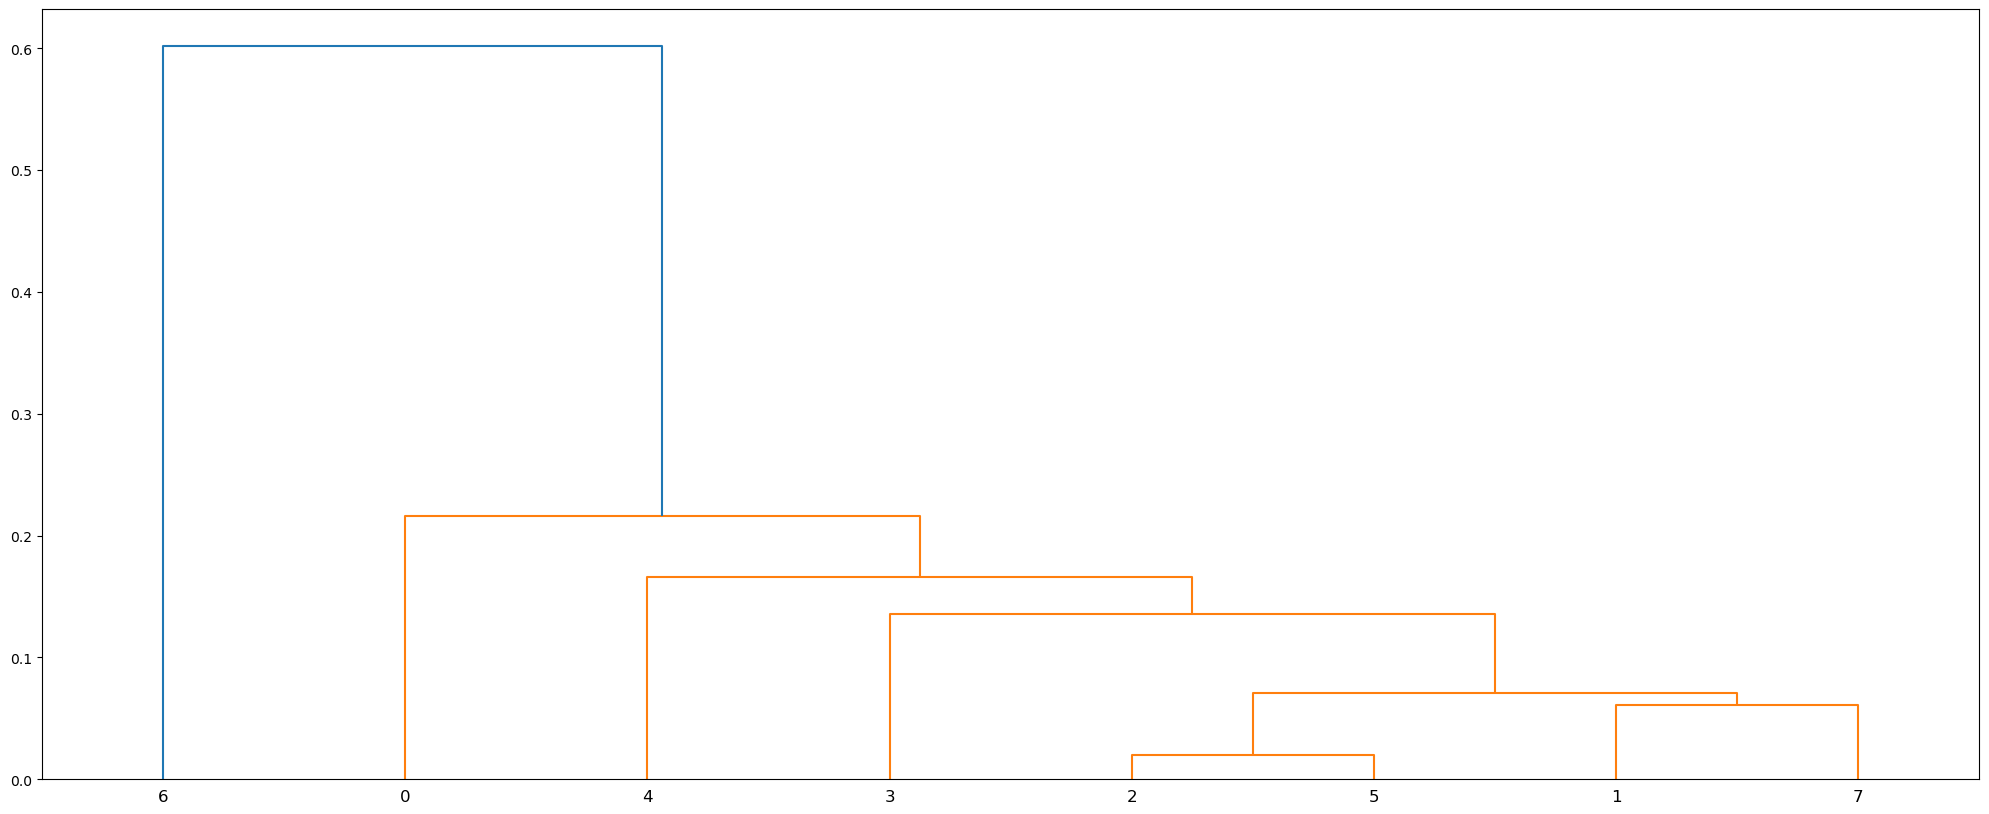

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [8]:
clust_energy_dict

{6: {'prog': [[0, 1, 7, 2, 5, 3, 4, 6]], 'net_energy': [1, 2, 2, 2, 2, 5, 5]},
 5: {'prog': [[0, 1, 7, 2, 5, 3, 4, 6]], 'net_energy': [1, 2, 2, 2, 2, 5, 5]},
 4: {'prog': [[0, 1, 7, 2, 5, 3, 4, 6]], 'net_energy': [1, 2, 2, 2, 2, 5, 5]},
 3: {'prog': [[0, 1, 7, 2, 5, 3, 4, 6]], 'net_energy': [1, 2, 2, 2, 2, 5, 5]},
 2: {'prog': [[0, 1, 7, 2, 5, 3, 4, 6]], 'net_energy': [1, 2, 2, 2, 2, 5, 5]},
 1: {'prog': [[0, 1, 7, 2, 5, 3, 4, 6]], 'net_energy': [1, 2, 2, 2, 2, 5, 5]},
 0: {'prog': [[0, 1, 7, 2, 5, 3, 4, 6]], 'net_energy': [1, 2, 2, 2, 2, 5, 5]}}

In [11]:
cluster_net_energy_lst =  [[eng] for eng in X_energy]

In [12]:
cluster_net_energy_lst

[[1], [4], [-2], [5], [-4], [3], [-2], [3]]

/var/folders/q_/clgqmhw518l64x3yxrsgtqd40000gn/T/ipykernel_9768/1034940195.py:7: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  X = scipy.randn(n,2)


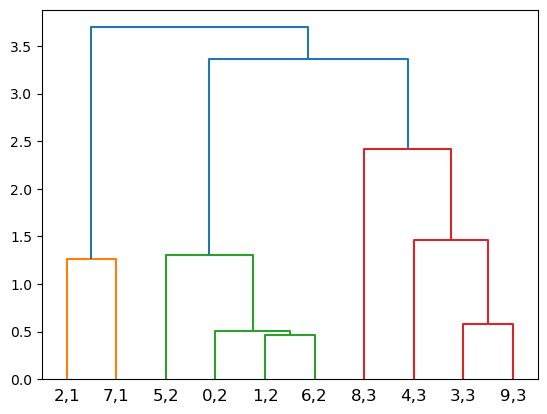

In [18]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

n=10
k=3
X = scipy.randn(n,2)
d = sch.distance.pdist(X)
Z= sch.linkage(d,method='complete')
T = sch.fcluster(Z, k, 'maxclust')

# calculate labels
labels=list('' for i in range(n))
for i in range(n):
    labels[i]=str(i)+ ',' + str(T[i])

# calculate color threshold
ct=Z[-(k-1),2]  

#plot
P =sch.dendrogram(Z,labels=labels,color_threshold=ct)
plt.show()

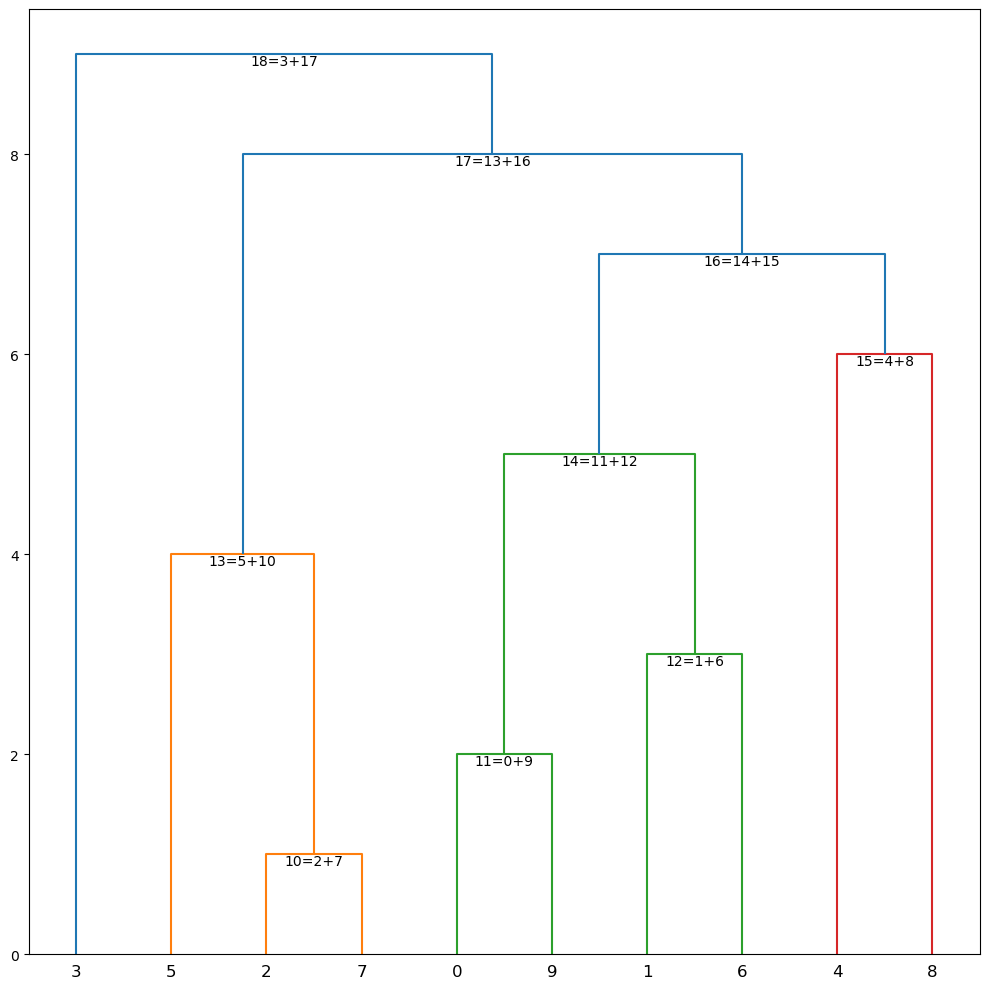

In [20]:
  #https://stackoverflow.com/questions/30317688/annotating-dendrogram-nodes-in-scipy-matplotlib
    
    Z = np.array([[ 2,  7,  0,  2],
           [ 0,  9,  0,  2],
           [ 1,  6,  0,  2],
           [ 5, 10,  0,  3],
           [11, 12,  0,  4],
           [ 4,  8,  0,  2],
           [14, 15,  0,  6],
           [13, 16,  0,  9],
           [ 3, 17,  1, 10]], dtype=float)

    Z[:, 2] = np.arange(1., len(Z)+1)
    labels = [str(len(Z)+1+ind)+'='+str(Z[ind,0].astype(int))+'+'+str(Z[ind,1].astype(int)) for ind in range(len(Z))]

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    dn = dendrogram(Z, ax=ax)
    ii = np.argsort(np.array(dn['dcoord'])[:, 1])
    for j, (icoord, dcoord) in enumerate(zip(dn['icoord'], dn['dcoord'])):
        x = 0.5 * sum(icoord[1:3])
        y = dcoord[1]
        ind = np.nonzero(ii == j)[0][0]
        ax.annotate(labels[ind], (x,y), va='top', ha='center')
    plt.tight_layout()
    plt.savefig('./tmp.png')
    plt.show()
    plt.close(fig)

In [21]:
# https://stackoverflow.com/questions/11917779/how-to-plot-and-annotate-hierarchical-clustering-dendrograms-in-scipy-matplotlib/12311782#12311782

In [22]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

/var/folders/q_/clgqmhw518l64x3yxrsgtqd40000gn/T/ipykernel_9768/1155259592.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  x = np.random.multivariate_normal([0, 0], np.array([[4.0, 2.5], [2.5, 1.4]]),


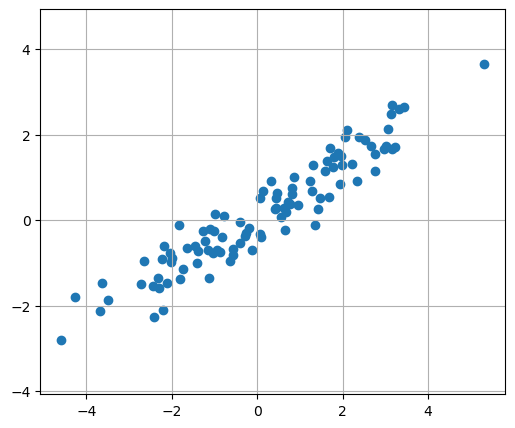

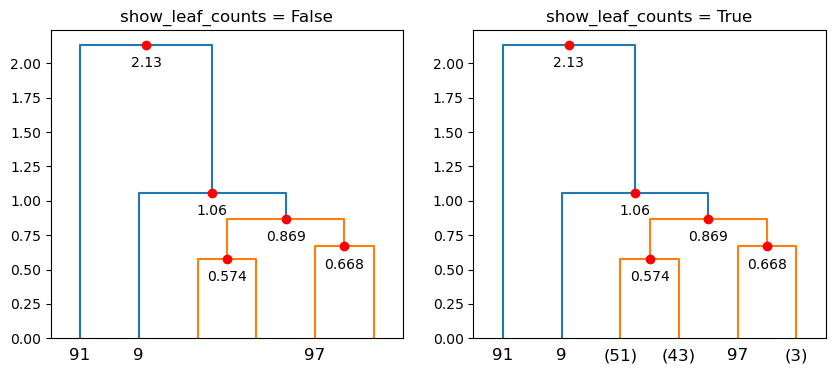

In [24]:
import numpy as np
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
#from augmented_dendrogram import augmented_dendrogram


# Generate a random sample of `n` points in 2-d.
np.random.seed(12312)
n = 100
x = np.random.multivariate_normal([0, 0], np.array([[4.0, 2.5], [2.5, 1.4]]),
                                  size=(n,))

plt.figure(1, figsize=(6, 5))
plt.clf()
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.grid(True)

linkage_matrix = linkage(x, "single")

plt.figure(2, figsize=(10, 4))
plt.clf()

plt.subplot(1, 2, 1)
show_leaf_counts = False
ddata = augmented_dendrogram(linkage_matrix,
               color_threshold=1,
               p=6,
               truncate_mode='lastp',
               show_leaf_counts=show_leaf_counts,
               )
plt.title("show_leaf_counts = %s" % show_leaf_counts)

plt.subplot(1, 2, 2)
show_leaf_counts = True
ddata = augmented_dendrogram(linkage_matrix,
               color_threshold=1,
               p=6,
               truncate_mode='lastp',
               show_leaf_counts=show_leaf_counts,
               )
plt.title("show_leaf_counts = %s" % show_leaf_counts)

plt.show()